__三维数据预处理及输入尺寸标准化模块__

(20, 40, 20)
(40, 20, 20)
(150, 150, 150)


{(55, 68, 65): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4959ee0>,
 (55, 68, 84): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4968700>,
 (55, 69, 65): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4968a90>,
 (55, 69, 84): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4968e50>,
 (55, 70, 65): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4a1a250>,
 (55, 70, 66): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4a1a610>,
 (55, 70, 83): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4a1a9d0>,
 (55, 70, 84): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4a1ad90>,
 (55, 71, 65): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4a26190>,
 (55, 71, 66): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4a26550>,
 (55, 71, 83): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4a26910>,
 (55, 71, 84): <mpl_toolkits.mplot3d.art3d.Poly3DCollection at 0x216a4a26cd0>,
 (55, 72, 65): <mpl_toolkits.mplot3d.art3d.Poly3DCol

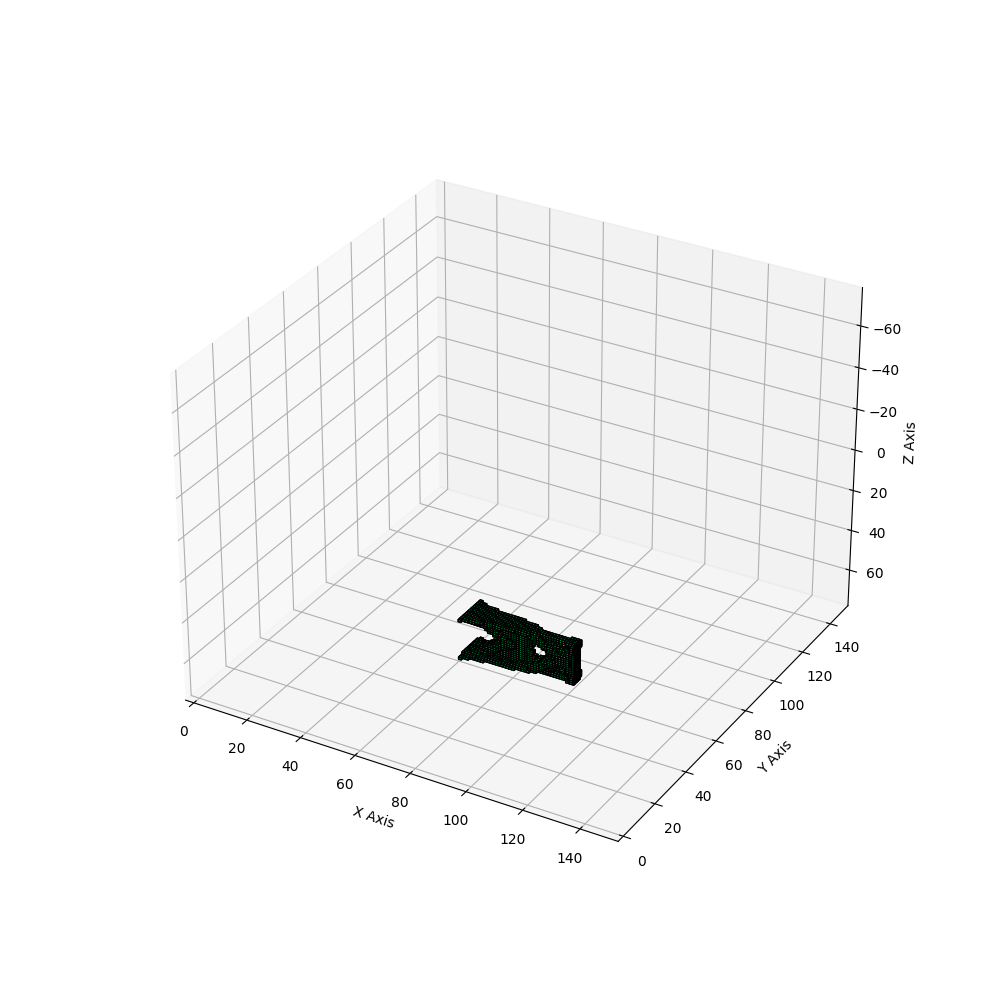

In [27]:
%matplotlib widget
import scipy.io as io
import numpy as np
import matplotlib.pyplot as plt
#导入数据并处理为完全0-1分布
data = io.loadmat('../../Matlab_files/top3d_Cantilever_3D/top3d_Cantilever_3D.mat')
data = data['ans']
data = np.array(data)
print(data.shape)
data = data.transpose(1, 2, 0)
print(data.shape)#(x,z,y)
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            if data[i][j][k] > 0.5:
                data[i][j][k] = 1
            else:
                data[i][j][k] = 0


#初始0-1分布数据绘图
# mycolormap = plt.get_cmap('winter')
# data_max = data.max()
# relativevalue = np.round(data / data_max, 1)
# colorsvalues = mycolormap(relativevalue)
# fig = plt.figure(figsize=(50, 50))
# ax = fig.add_subplot(projection='3d')
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# ax.set_xlim(0, 150)
# ax.set_ylim(0, 150)
# ax.set_zlim(75, -75)
# ax.voxels(data, facecolors=colorsvalues,edgecolors = 'k', shade = False)

#数据尺寸扩展为标准尺寸
nelx, nely, nelz = 150, 150, 150
if (nelx - data.shape[0])%2 !=0:
    data = np.pad(data, ((1, 0), (0, 0), (0 ,0)))
if (nelz - data.shape[1])%2 !=0:
    data = np.pad(data, ((0, 0), (1, 0), (0 ,0)))
if (nely - data.shape[2])%2 !=0:
    data = np.pad(data, ((0, 0), (0, 0), (1 ,0)))
data_new = np.pad(data, (((nelx - data.shape[0])//2, (nelx - data.shape[0])//2),
                     ((nely - data.shape[1])//2, (nely - data.shape[1])//2),
                     ((nelz - data.shape[2])//2, (nelx - data.shape[2])//2)))
print(data_new.shape)
#输入数据标准化后绘图
mycolormap = plt.get_cmap('winter')
data_new_max = data.max()
relativevalue = np.round(data_new / data_new_max, 1)
colorsvalues = mycolormap(relativevalue)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(75, -75)
ax.voxels(data_new, facecolors=colorsvalues,edgecolors = 'k', shade = False)
# np.save('../../topdata/dataset/input/',data_new)

__六方体行进法遍历模型，寻找断裂点，单共享边修复模块__

1: [0.0]
2: [0.0, 0.0]
3: [0.0, 0.0, 0.0]
4: [0.0, 0.0, 0.0, 1.0]
5: [0.0, 0.0, 0.0, 1.0, 0.0]
6: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
face_voxel: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
1: [0.0]
2: [0.0, 0.0]
3: [0.0, 0.0, 0.0]
4: [0.0, 0.0, 0.0, 1.0]
5: [0.0, 0.0, 0.0, 1.0, 0.0]
6: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
face_voxel: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
1: [0.0]
2: [0.0, 1.0]
3: [0.0, 1.0, 1.0]
4: [0.0, 1.0, 1.0, 1.0]
5: [0.0, 1.0, 1.0, 1.0, 0.0]
6: [0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
face_voxel: [0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
1: [0.0]
2: [0.0, 1.0]
3: [0.0, 1.0, 1.0]
4: [0.0, 1.0, 1.0, 1.0]
5: [0.0, 1.0, 1.0, 1.0, 0.0]
6: [0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
face_voxel: [0.0, 1.0, 1.0, 1.0, 0.0, 0.0]
1: [0.0]
2: [0.0, 1.0]
3: [0.0, 1.0, 1.0]
4: [0.0, 1.0, 1.0, 1.0]
5: [0.0, 1.0, 1.0, 1.0, 0.0]
6: [0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
face_voxel: [0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
1: [0.0]
2: [0.0, 1.0]
3: [0.0, 1.0, 0.0]
4: [0.0, 1.0, 0.0, 1.0]
5: [0.0, 1.0, 0.0, 1.0, 1.0]
6: [0.0, 1.0, 0.0, 1.0, 1.0, 0.0]
face_voxel:

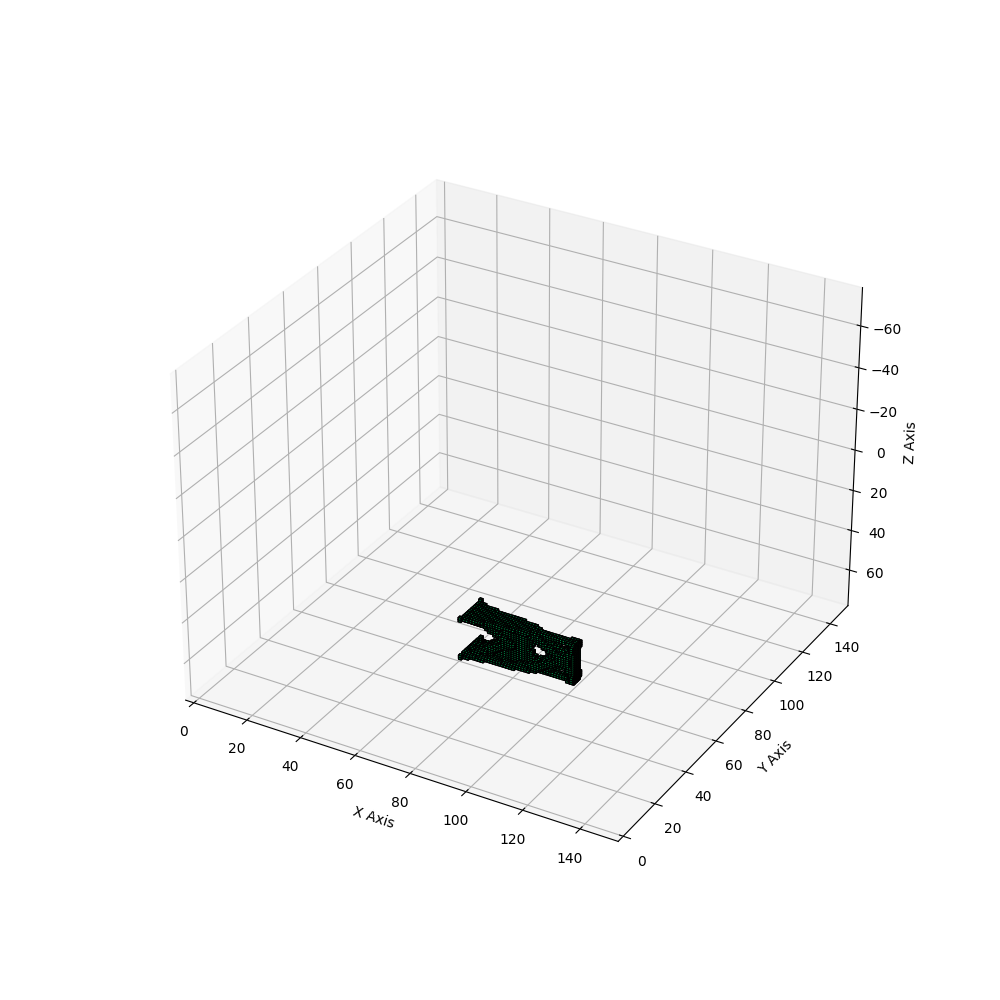

In [28]:
%matplotlib widget
label_data = np.zeros((150, 150, 150))
face_voxel = []

n = 0
for i in range(data_new.shape[0]):
    for j in range(data_new.shape[1]):
        for k in range(data_new.shape[2]):
            if data_new[i][j][k] !=0:
                face_voxel.append(data_new[i-1][j][k])
                print('1:',face_voxel)
                face_voxel.append(data_new[i+1][j][k])
                print('2:',face_voxel)
                face_voxel.append(data_new[i][j-1][k])
                print('3:',face_voxel)
                face_voxel.append(data_new[i][j+1][k])
                print('4:',face_voxel)
                face_voxel.append(data_new[i][j][k-1])
                print('5:',face_voxel)
                face_voxel.append(data_new[i][j][k+1])
                print('6:',face_voxel)
                sum_value = sum(face_voxel)
                print('face_voxel:',face_voxel)

                if sum_value == 0 or sum_value == 1:
                    # label_data[i-2:i+2,j-2:j+2,k-2:k+2] = data_new[i-2:i+2,j-2:j+2,k-2:k+2]
                    # data_new[i-1, j-1, k+1] = 1
                    data_new[i, j, k-1] = 1

                face_voxel = []
            n += 1
print('遍历了：',n,'次')

#绘制修补完成的模型
mycolormap = plt.get_cmap('winter')
data_new_max = data_new.max()
relativevalue = np.round(data_new / data_new_max, 1)
colorsvalues = mycolormap(relativevalue)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_xlim(0, 150)
ax.set_ylim(0, 150)
ax.set_zlim(75, -75)
ax.voxels(data_new, facecolors=colorsvalues,edgecolors = 'k', shade = False)
#绘制抓取的缺陷结构
# mycolormap = plt.get_cmap('winter')
# label_data_max = label_data.max()
# relativevalue = np.round(label_data / label_data_max, 1)
# colorsvalues = mycolormap(relativevalue)
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(projection='3d')
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# ax.set_xlim(0, 150)
# ax.set_ylim(0, 150)
# ax.set_zlim(75, -75)
# ax.voxels(label_data, facecolors=colorsvalues,edgecolors = 'k', shade = False)

np.save('../../topdata/dataset/label/top3d_Cantilever_3D_label_1',data_new)


__.npy文件转.mat文件模块__

In [29]:
import scipy.io as io
io.savemat('../../topdata/topdata_mat/top3d_Cantilever_3D.mat',{'data':data_new})

__三维输入结构随机断裂模块__

进行了 274 次搜索
1.0
i, j, k: 56 75 82


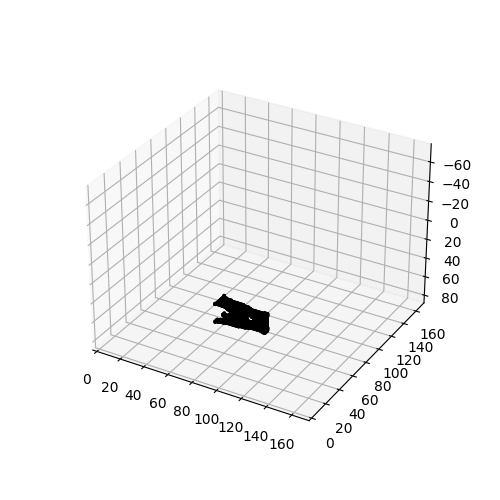

In [31]:
%matplotlib widget
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt


# #读取数据
# data_old = io.loadmat('../../Matlab_files/top3d_MBB/top3d_MBB_200.mat')
# data_old = data_old['ans']
# data_old = np.array(data_old)
# data_old = data_old.transpose(1, 2, 0)
# print(data_old.shape)#(x,z,y)


# #预处理数据为0-1分布
# for i in range(data_old.shape[0]):
#     for j in range(data_old.shape[1]):
#         for k in range(data_old.shape[2]):
#             if data_old[i][j][k] > 0.5:
#                 data_old[i][j][k] = 1
#             else:
#                 data_old[i][j][k] = 0

# #处理数据为标准输入尺寸                
# nelx, nely, nelz = 100, 100, 100
# if (nelx - data_old.shape[0])%2 !=0:
#     data_old = np.pad(data_old, ((1, 0), (0, 0), (0 ,0)))
# if (nelz - data_old.shape[1])%2 !=0:
#     data_old = np.pad(data_old, ((0, 0), (1, 0), (0 ,0)))
# if (nely - data_old.shape[2])%2 !=0:
#     data_old = np.pad(data_old, ((0, 0), (0, 0), (1 ,0)))
# data_new = np.pad(data_old, (((nelx - data_old.shape[0])//2, (nelx - data_old.shape[0])//2),
#                      ((nely - data_old.shape[1])//2, (nely - data_old.shape[1])//2),
#                      ((nelz - data_old.shape[2])//2, (nelx - data_old.shape[2])//2)))
# print('data_new:',data_new.shape)

#随机断开模型结构
extract_data = 0
i = 0
while extract_data ==0:
    index = np.random.randint(0, 100, size=(3, ))
    extract_data = data_new[index[0]][index[1]][index[2]]
    i +=1
print('进行了',i,'次搜索')
print(extract_data)
i, j ,k = index[0], index[1], index[2]
print('i, j, k:',i,j,k)
for m in range(i-3,i+4):
    for n in range(j-3, j+4):
        for t in range(k-3, k+4):
            data_new[m][n][t] = 0

input_data = data_new
mycolormap = plt.get_cmap('winter')
input_data_max = input_data.max()
relativevalue = np.round(input_data / input_data_max, 1)
colorsvalues = mycolormap(relativevalue)
fig  = plt.figure(figsize=(5 ,5))
ax = fig.add_subplot(projection='3d')
ax.set_xlim(0, 170)
ax.set_ylim(0, 170)
ax.set_zlim(85, -75)
ax.voxels(input_data, facecolors=colorsvalues, edgecolors='k',shade=False)

np.save('../../topdata/dataset/input/top3d_MBB_200_input_5.npy',input_data)